___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [12]:
# Get data using pandas datareader:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)


In [14]:
import quandl as ql
# Google and Yahoo Finance didnt work so use Quandl instead

In [16]:
BAC = ql.get("WIKI/BAC", start_date="2006-01-01", end_date="2016-01-01")

In [29]:
# BAC = data.DataReader('BAC','yahoo',start, end)
# BAC = data.DataReader('BAC','google',start, end)
BAC = BAC.iloc[:,:5]

In [34]:
# CitiGroup
C = ql.get("WIKI/C", start_date="2006-01-01", end_date="2016-01-01")
# Goldman Sachs
GS = ql.get("WIKI/GS", start_date="2006-01-01", end_date="2016-01-01")
# JPMorgan Chase
JPM = ql.get("WIKI/JPM", start_date="2006-01-01", end_date="2016-01-01")
# Morgan Stanley
MS = ql.get("WIKI/MS", start_date="2006-01-01", end_date="2016-01-01")
# Wells Fargo
WFC = ql.get("WIKI/WFC", start_date="2006-01-01", end_date="2016-01-01")


In [35]:
C = C.iloc[:,:5]
GS = GS.iloc[:,:5]
JPM = JPM.iloc[:,:5]
MS = MS.iloc[:,:5]
WFC = WFC.iloc[:,:5]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [36]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [38]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [39]:
bank_stocks.head()

BAC                                       C                \
             Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                      
2006-01-03  46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04  47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05  46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06  46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09  46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

                                 ...         MS                         \
            Close      Volume    ...       Open   High      Low  Close   
Date                             ...                                     
2006-01-03  49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04  48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05  48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06  48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09  48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

                         WFC                                  
               Volume   Open   High    Low  Close     Volume  
Date                                                          
2006-01-03  5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04  7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05  5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06  6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09  4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 30 columns]

** Set the column name levels:**

In [40]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [41]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                       
2006-01-03   46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

Bank Ticker                       ...         MS                         \
Stock Info   Close      Volume    ...       Open   High      Low  Close   
Date                              ...                                     
2006-01-03   49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04   48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05   48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06   48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09   48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

Bank Ticker               WFC                                  
Stock Info      Volume   Open   High    Low  Close     Volume  
Date                                                           
2006-01-03   5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04   7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05   5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06   6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09   4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [43]:
for tick in tickers:
    MaxClose = bank_stocks[tick]['Close'].max()
    print(tick, MaxClose)

BAC 54.9
C 60.34
GS 247.92
JPM 70.08
MS 89.3
WFC 73.0


In [45]:
# Using .xs
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [48]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [50]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [51]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

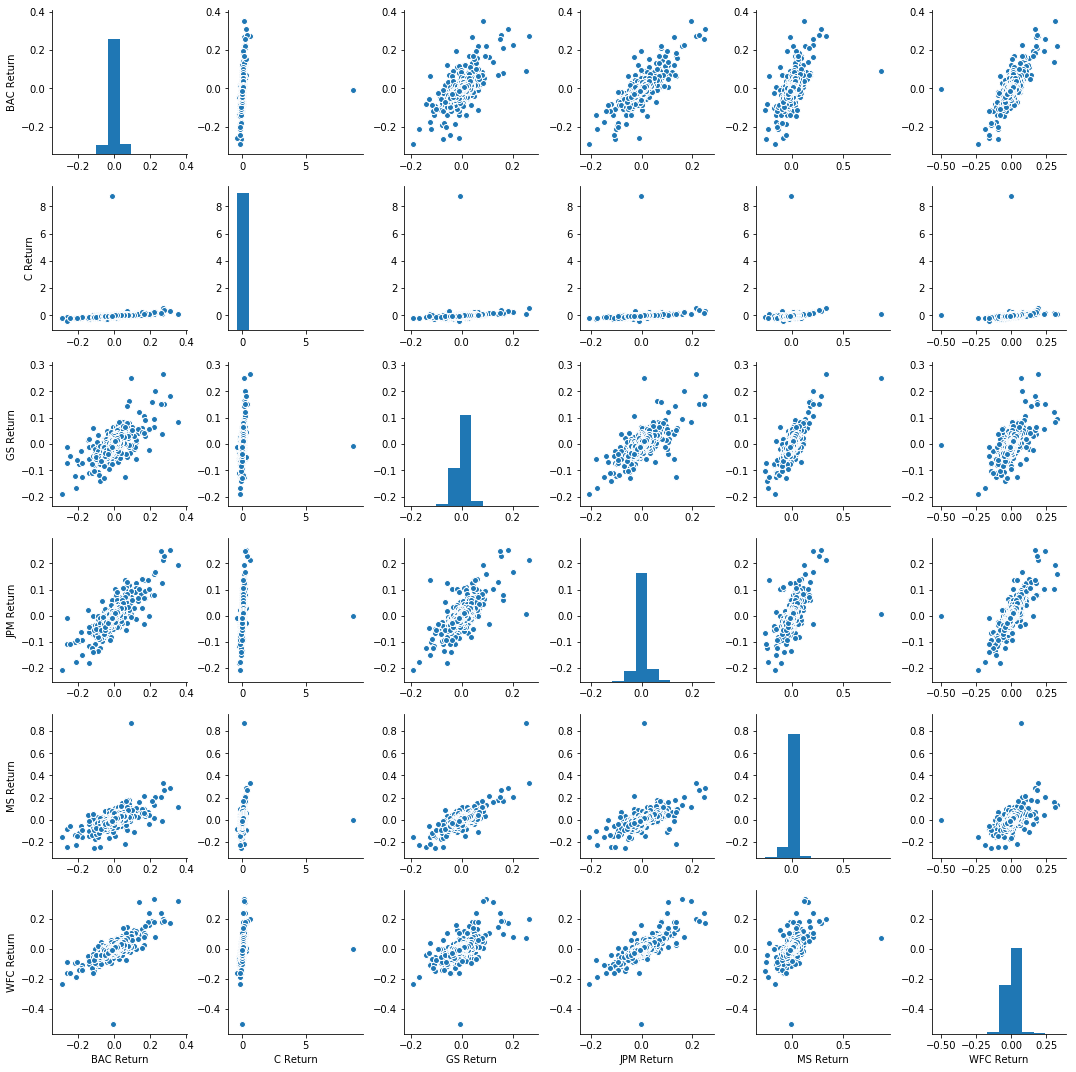

In [53]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....
(Huge crash in 2008)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [60]:
returns.idxmin() 
# returns the indexes of the minimum values of returns for each bank

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

In [58]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [61]:
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

In [63]:
returns.ix['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

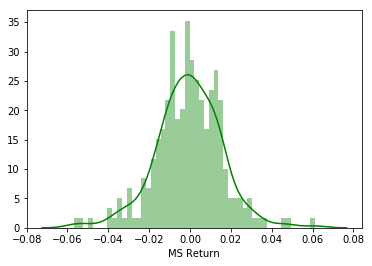

In [66]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'], color='green', 
             bins= 50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

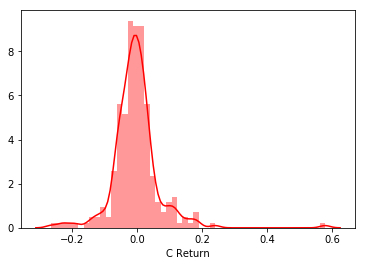

In [67]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'], color='red', 
             bins =50) 
# Outliers existed
# Returns deviated quite a bit from the average 

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

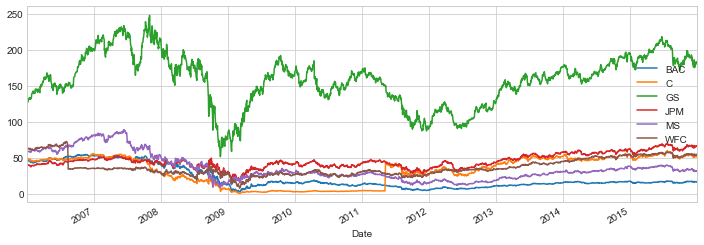

In [73]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize =(12,4))
plt.legend()

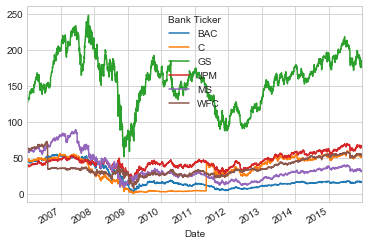

In [75]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').plot()

In [81]:
# Using plotly
bank_stocks.xs(key='Close', axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

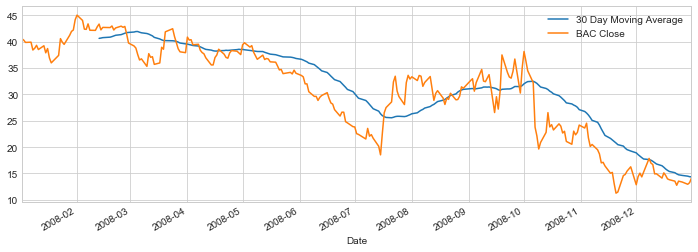

In [88]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window =30).mean().plot(label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

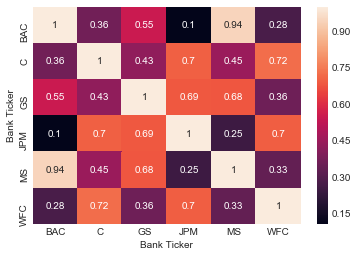

In [92]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

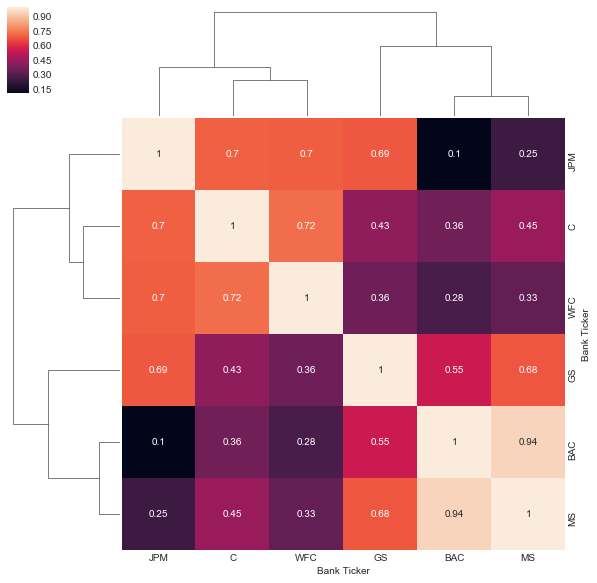

In [94]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(),annot=True)

In [96]:
close_corr = bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr()

In [99]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [102]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [103]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [104]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.